<a href="https://colab.research.google.com/github/frankthairu/Fifa-Modelling-project/blob/main/Fifa_regression_by_Francis_Thairu12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

The men's FIFA World Ranking is a ranking system for men's national teams in association football, currently led by Belgium.[1] The teams of the men's member nations of FIFA, football's world governing body, are ranked based on their game results with the most successful teams being ranked highest. The rankings were introduced in December 1992, and eight teams (Argentina, Belgium, Brazil, France, Germany, Italy, the Netherlands and Spain) have held the top position, of which Brazil have spent the longest ranked first.

A points system is used, with points being awarded based on the results of all FIFA-recognised full international matches. The ranking system has been revamped on several occasions, generally responding to criticism that the preceding calculation method did not effectively reflect the relative strengths of the national teams. Since 16 August 2018, the current version of the ranking system has adopted the Elo rating system used in chess and Go.



1.   Specyfying the Data Analytic 
Question

The main aim of our research is to find an appropriate model that will predict whether a home team will loose or win .


2. Defining the Metric for Success

In order to perform a successful analysis we first need to perform univariate analysis which will help us understand more about the important variables individually. This way, when we perform other analysis, we will be able to understand better. We we also be doing bivariate analysis.

We will finally conclude with building models that can help us make predictions. 

3. Understanding the context

The datasets that we will be using are 2 fifa datasets.

4. Recording the Experimental Design Below are the steps i took to implement this solution

a) Business Understanding: This sheds light to the context of the business question that we are trying to answer hence keep the focus during the data analysis so that we meet the intended objective.

b) Reading the data: Reading our data with and aim to understand the variables and observations.

c) Checking our data: This to get details about the dataset, the number of records, the statistal summary,the datatypes in our dataset among others.

d) Data cleaning, I performed all my data cleaning and preparation to make my data ready for analysis. The dataset we will be using is in the links below



e) EDA, the data was analysed and visualized.

f) Implementing the solution using Linear discriminant analaysis and CPA

g) Challenged the solution.

h)Conclusion


5. Data Relevance 

The data we have is updated and relevent since we are using records over the years in order to predict the future.









# Import the Relevant Libraries

In [130]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sb
from scipy.stats import norm
import pylab
from scipy import stats
from statsmodels.stats import weightstats as stests
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
%matplotlib inline


# Loading the data

In [14]:
#We read our first dataset
#
df=pd.read_csv("/content/fifa_ranking.csv")
df.tail()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


In [8]:
df.rename(columns = {'rank_date':'date'}, inplace = True)
df.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [10]:
#cleaning our data
# Change Date column to datetime type
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y')

ValueError: ignored

In [15]:
#We read our second data
#
df1=pd.read_csv("/content/results.csv")
df1.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


In [43]:
#cleaning our data
# Change Date column to datetime type
new['date'] = pd.to_datetime(new['rank_date'], format='%m/%d/%Y')

In [45]:
#we merge the two datasets
#
new = pd.merge(df1, df,left_on='date',right_on='rank_date')
new.head()


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [ ]:
new = pd.merge(home_team, away_team, left_on=['home_team', 'away_team', 'home_score', 'away_score', 'tournament','status', 'year', 'month'],
                    right_on = ['home_team', 'away_team', 'home_score', 'away_score', 'tournament','status', 'year', 'month'],
                    how = 'inner')

#### Variable deascription

In [29]:
#Rank
#Country Abbreviation
#Previous Points
#Rank Change
#Average Previous Years Points
#Average Previous Years Points Weighted (50%)
#Average 2 Years Ago Points
#Average 2 Years Ago Points Weighted (30%)
#Average 3 Years Ago Points
#Average 3 Years Ago Points Weighted (20%)
#Confederation
#Date - date of the match
#Home_team - the name of the home team
#Away_team - the name of the away team
#Home_score - full-time home team score including extra time, not including penalty-shootouts
#Away_score - full-time away team score including extra time, not including penalty-shootouts
#Tournament - the name of the tournament
#City - the name of the city/town/administrative unit where the match was played
#Country - the name of the country where the match was played
#Neutral - TRUE/FALSE column indicating whether the match was played at a neutral venue

In [30]:
#finding unique values in our columns
new.nunique()

date                        172
home_team                   198
away_team                   202
home_score                   15
away_score                   11
tournament                   40
city                        449
country                     172
neutral                       2
rank                        209
country_full                216
country_abrv                216
total_points               5143
previous_points            1427
rank_change                  95
cur_year_avg               3970
cur_year_avg_weighted      3970
last_year_avg              3990
last_year_avg_weighted     3858
two_year_ago_avg           3888
two_year_ago_weighted      3597
three_year_ago_avg         3900
three_year_ago_weighted    3410
confederation                 6
rank_date                   172
dtype: int64

# Data cleaning

In [46]:
#inspecting the data
#finding the statistical summaries in our data
new.describe()

,home_score,away_score,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted
count,212831.000000,212831.000000,212831.000000,212831.000000,212831.000000,212831.000000,212831.000000,212831.000000,212831.000000,212831.000000,212831.000000,212831.000000,212831.000000,212831.000000
mean,1.682109,1.047033,101.865569,42.595921,341.226241,-0.009233,21.501386,21.501386,21.121801,10.560920,20.978279,6.293489,21.200981,4.240217
std,1.970033,1.257858,58.645033,163.908824,295.081640,4.537736,85.367571,85.367571,89.736563,44.868317,84.562404,25.368726,86.314387,17.262906
min,0.000000,0.000000,1.000000,0.000000,0.000000,-62.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,51.000000,0.000000,71.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,102.000000,0.000000,297.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,2.000000,152.000000,0.000000,531.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,31.000000,12.000000,209.000000,1770.060000,1920.000000,71.000000,1126.040000,1126.040000,1169.570000,584.790000,1159.710000,347.910000,1200.770000,240.150000


In [47]:
#inspecting the data
#checking types contained in our data
new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212831 entries, 0 to 212830
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   date                     212831 non-null  object 
 1   home_team                212831 non-null  object 
 2   away_team                212831 non-null  object 
 3   home_score               212831 non-null  int64  
 4   away_score               212831 non-null  int64  
 5   tournament               212831 non-null  object 
 6   city                     212831 non-null  object 
 7   country                  212831 non-null  object 
 8   neutral                  212831 non-null  bool   
 9   rank                     212831 non-null  int64  
 10  country_full             212831 non-null  object 
 11  country_abrv             212831 non-null  object 
 12  total_points             212831 non-null  float64
 13  previous_points          212831 non-null  int64  
 14  rank

In [48]:
#inspecting our data
#checking for null values in our dataset
new.isnull().sum().sum()

0

In [50]:
#inspecting our data
#we check for the no of duplicates
new.duplicated().sum()

33

In [49]:
#inspecting our data
#inspecting column names
new.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'rank', 'country_full',
       'country_abrv', 'total_points', 'previous_points', 'rank_change',
       'cur_year_avg', 'cur_year_avg_weighted', 'last_year_avg',
       'last_year_avg_weighted', 'two_year_ago_avg', 'two_year_ago_weighted',
       'three_year_ago_avg', 'three_year_ago_weighted', 'confederation',
       'rank_date'],
      dtype='object')

By doing this we see which names have mistakes then appropriately correct them

In [51]:
# Creating a function to be used to create a win, draw or lose column (status)
#The code minuses the away score from the home score so as to see the difference
#A negative result shows lose, a positive is a win while 0 is a draw
new['score'] = new.home_score - new.away_score

def result(goals):
  if goals > 0:
    return 'Win'
  elif goals < 0:
    return 'Lose'
  else:
    return 'Draw'
# Applying the result function to the dataframe
#
new['result'] = new.score.apply(lambda x: result(x))

# Dropping the score column, as it has served its purpose of creating the status column
#
new.drop('score', axis = 1, inplace = True)


# Previewing to see if there's change 
new.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,result
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,Win
1,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,Win
2,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,Win
3,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,Win
4,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,Win


In [52]:
new.drop(['neutral', 'total_points', 'previous_points', 'previous_points','confederation','cur_year_avg_weighted', 'last_year_avg',
       'last_year_avg_weighted', 'two_year_ago_avg', 'two_year_ago_weighted',
       'three_year_ago_avg', 'three_year_ago_weighted','country_abrv','rank_change','cur_year_avg'], axis = 1, inplace = True)
new.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,rank,country_full,rank_date,result
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,1,Germany,1993-08-08,Win
1,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,2,Italy,1993-08-08,Win
2,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,3,Switzerland,1993-08-08,Win
3,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,4,Sweden,1993-08-08,Win
4,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,5,Argentina,1993-08-08,Win


In [53]:
#we change date to appropriate date type
new['date'] = pd.to_datetime(new['date'], errors='coerce')
new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212831 entries, 0 to 212830
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   date          212831 non-null  datetime64[ns]
 1   home_team     212831 non-null  object        
 2   away_team     212831 non-null  object        
 3   home_score    212831 non-null  int64         
 4   away_score    212831 non-null  int64         
 5   tournament    212831 non-null  object        
 6   city          212831 non-null  object        
 7   country       212831 non-null  object        
 8   rank          212831 non-null  int64         
 9   country_full  212831 non-null  object        
 10  rank_date     212831 non-null  object        
 11  result        212831 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 21.1+ MB


In [85]:
#we change rank date to appropriate date type
new['rank_date'] = pd.to_datetime(new['rank_date'], errors='coerce')
new.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,rank,country_full,rank_date,result,year,month
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,1,Germany,1993-08-08,Win,1993,8
1,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,2,Italy,1993-08-08,Win,1993,8
2,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,3,Switzerland,1993-08-08,Win,1993,8
3,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,4,Sweden,1993-08-08,Win,1993,8
4,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,5,Argentina,1993-08-08,Win,1993,8


In [84]:
#We separate months and years in our new dataset
new['year'] = new.date.dt.year
new['year'] = new.date.dt.year

new['month'] = new.date.dt.month
new['month'] = new.date.dt.month

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


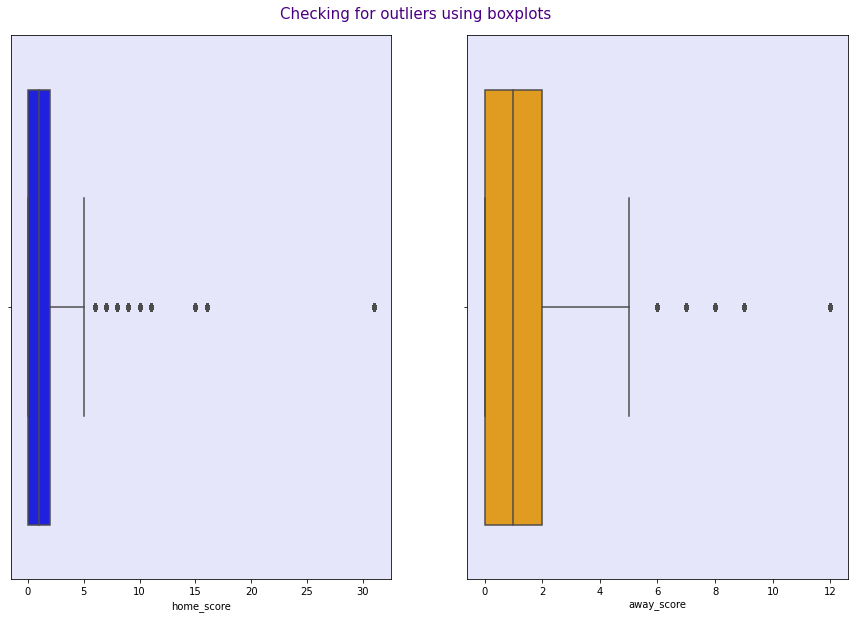

In [78]:
#we check for outliers in or main columns

column_list = ['home_score', 'away_score']
colors = ['blue', 'orange']

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 10))
plt.suptitle('Checking for outliers', fontsize = 15, y = 0.92, color = 'indigo')
for ax, data, column, color in zip(axes.flatten(), new, column_list, colors):
  sns.boxplot(new[column], ax = ax, color = color)
  ax.set_facecolor('lavender') 
  #we wont drop outliers for they take up most of our data

we dont drop outliersbecause they consist of majority of our dataset.

Outliers also help in creation of a good moel.

# Exporting our cleaned Dataset

In [86]:
#We export our cleaned dataset into a csv file
#
new.to_csv('New_Fifa.csv',index=False, header=True)

In [87]:
#reading our new dataset and viewing the first 5 rows
#
df2=pd.read_csv("New_Fifa.csv")
df2.tail(10)

,date,home_team,away_team,home_score,away_score,tournament,city,country,rank,country_full,rank_date,result,year,month
212821,2018-06-07,Kárpátalja,Székely Land,4,2,CONIFA World Football Cup,Carshalton,England,202,Cayman Islands,2018-06-07,Win,2018,6
212822,2018-06-07,Kárpátalja,Székely Land,4,2,CONIFA World Football Cup,Carshalton,England,203,San Marino,2018-06-07,Win,2018,6
212823,2018-06-07,Kárpátalja,Székely Land,4,2,CONIFA World Football Cup,Carshalton,England,204,British Virgin Islands,2018-06-07,Win,2018,6
212824,2018-06-07,Kárpátalja,Székely Land,4,2,CONIFA World Football Cup,Carshalton,England,204,Montserrat,2018-06-07,Win,2018,6
212825,2018-06-07,Kárpátalja,Székely Land,4,2,CONIFA World Football Cup,Carshalton,England,206,Turks and Caicos Islands,2018-06-07,Win,2018,6
212826,2018-06-07,Kárpátalja,Székely Land,4,2,CONIFA World Football Cup,Carshalton,England,206,Anguilla,2018-06-07,Win,2018,6
212827,2018-06-07,Kárpátalja,Székely Land,4,2,CONIFA World Football Cup,Carshalton,England,206,Bahamas,2018-06-07,Win,2018,6
212828,2018-06-07,Kárpátalja,Székely Land,4,2,CONIFA World Football Cup,Carshalton,England,206,Eritrea,2018-06-07,Win,2018,6
212829,2018-06-07,Kárpátalja,Székely Land,4,2,CONIFA World Football Cup,Carshalton,England,206,Somalia,2018-06-07,Win,2018,6
212830,2018-06-07,Kárpátalja,Székely Land,4,2,CONIFA World Football Cup,Carshalton,England,206,Tonga,2018-06-07,Win,2018,6


# Exploratory Data Analysis:Univariate analysis

In [96]:
#we check sum of unique values in our dataset
df2.nunique()

date            172
home_team       198
away_team       202
home_score       15
away_score       11
tournament       40
city            449
country         172
rank            209
country_full    216
rank_date       172
result            3
year             26
month            12
dtype: int64

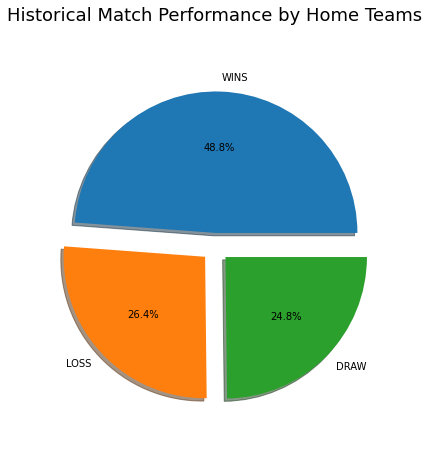

In [143]:
# Visualizing the results of the matches over the years

plt.figure(figsize=(6,8))
plt.pie(df2['result'].value_counts(),labels=['WINS','LOSS','DRAW'], explode=[0.1,0.1,0.1], autopct='%1.1f%%',shadow=True, startangle=0)
plt.axis('equal')
plt.title('Results of matches', size=18)
plt.show()

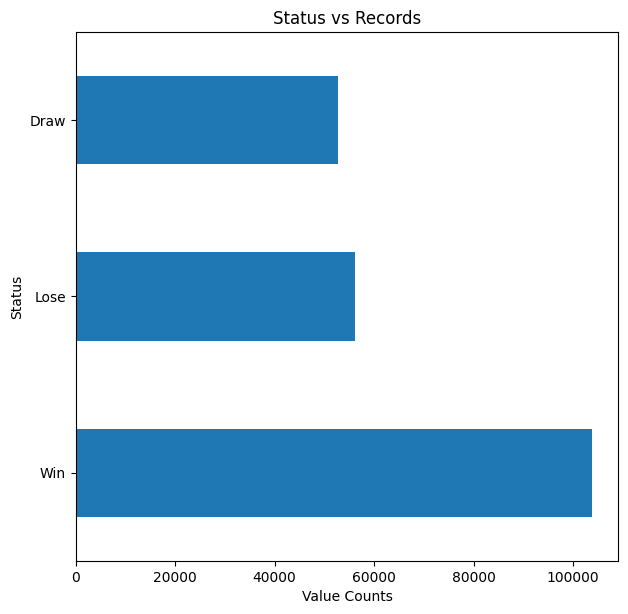


***********


Win     103912
Lose     56090
Draw     52829
Name: result, dtype: int64

In [110]:
#creating a bar graph of the years with the largest records
#
plt.figure(figsize = (7,7), dpi = 100)
df2.result.value_counts().head()
df2.result.value_counts().head().plot(kind= 'barh')
plt.title('Status vs Records')
plt.xlabel('Value Counts')
plt.ylabel('Status')
plt.show()

print("")
print("***********")
df2.result.value_counts()

We can see that many countries won

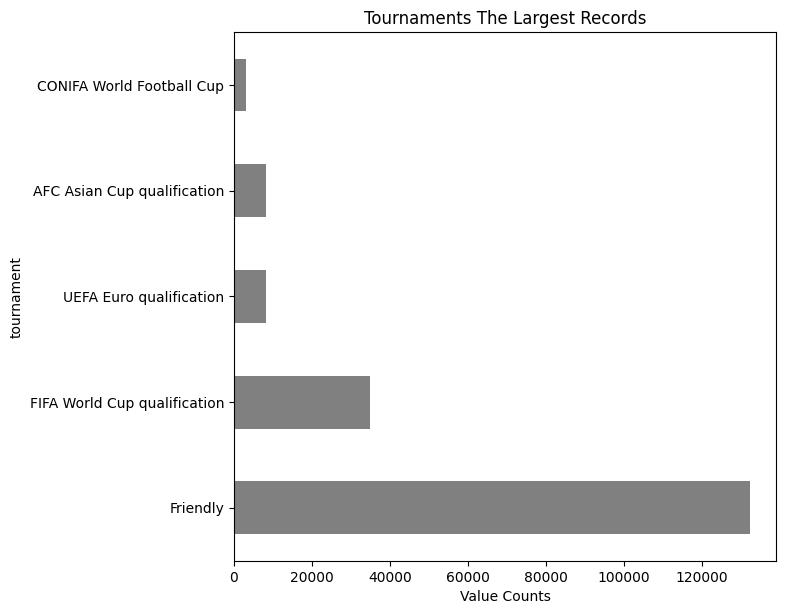

In [160]:
plt.figure(figsize = (7,7), dpi = 100)
df2.tournament.value_counts().head()
df2.tournament.value_counts().head().plot(kind= 'barh',color='Grey')
plt.title('Tournaments The Largest Records')
plt.xlabel('Value Counts')
plt.ylabel('tournament')
plt.show()

we can see that friendly matches were the ones played the most

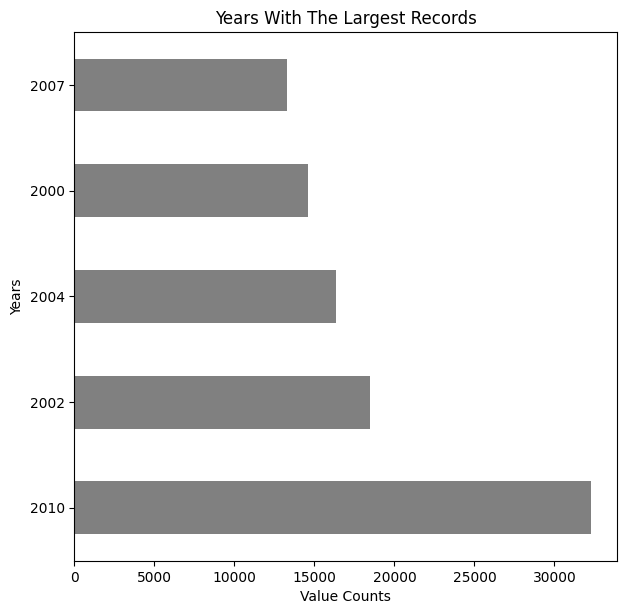

In [106]:
#creating a bar graph of the years with the largest records
#
plt.figure(figsize = (7,7), dpi = 100)
df2.year.value_counts().head()
df2.year.value_counts().head().plot(kind= 'barh',color='Grey')
plt.title('Years With The Largest Records')
plt.xlabel('Value Counts')
plt.ylabel('Years')
plt.show()

we see that 2010 was year with highest records

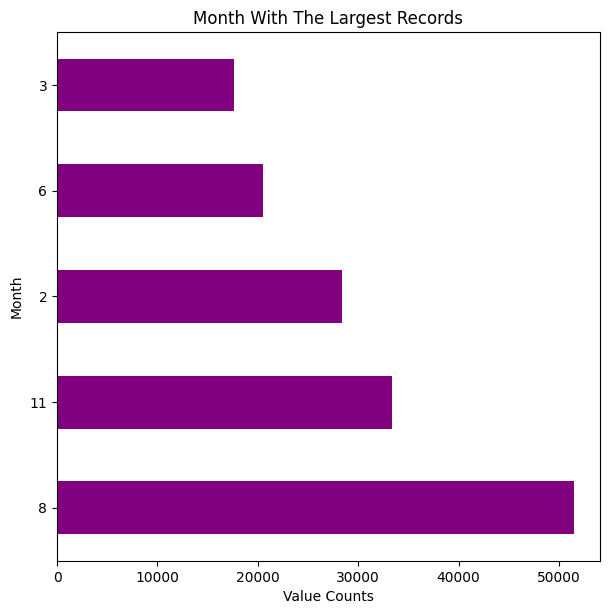

In [107]:
##creating a bar graph of the months with the largest records
#
plt.figure(figsize = (7,7), dpi = 100)
df2.month.value_counts().head()
df2.month.value_counts().head().plot(kind= 'barh',color='Purple')
plt.title('Month With The Largest Records')
plt.xlabel('Value Counts')
plt.ylabel('Month')
plt.show()

we see that august was month with highest records

#  Exploratory Data Analysis:Bivariate analysis

In [112]:
#this label encoding will be needed for correlation and multivariate analysis

#encoding the object columns
columns = ['date','home_team','away_team','home_score','away_score','tournament','city','country','rank','country_full','rank_date','result','year','month']
#'
# we convert the categorical variables 
#
df3= df2[columns].apply(LabelEncoder().fit_transform)
#
# Print head
#
df3.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,rank,country_full,rank_date,result,year,month
0,0,24,191,3,1,17,196,20,0,75,0,2,0,7
1,0,24,191,3,1,17,196,20,1,95,0,2,0,7
2,0,24,191,3,1,17,196,20,2,185,0,2,0,7
3,0,24,191,3,1,17,196,20,3,184,0,2,0,7
4,0,24,191,3,1,17,196,20,4,8,0,2,0,7


#### Heat map

In [113]:
#this is a summary analysis of the correlation coefficients in the datasets

corr = df3.corr()

corr.style.background_gradient(cmap='coolwarm')

,date,home_team,away_team,home_score,away_score,tournament,city,country,rank,country_full,rank_date,result,year,month
date,1.000000,0.005105,0.001707,0.014614,0.000496,-0.092362,0.031814,-0.017665,0.050143,-0.011844,1.000000,-0.000240,0.990043,-0.022861
home_team,0.005105,1.000000,0.041563,0.018318,-0.066766,-0.045191,-0.084930,0.796561,-0.000166,0.000100,0.005105,0.017377,0.007690,-0.006571
away_team,0.001707,0.041563,1.000000,-0.078760,0.049475,-0.060636,-0.075599,0.013487,-0.000515,-0.000097,0.001707,-0.020072,0.002285,0.003655
home_score,0.014614,0.018318,-0.078760,1.000000,-0.152443,-0.061505,-0.027243,-0.008970,-0.000666,0.000267,0.014614,0.511737,0.023484,-0.003205
away_score,0.000496,-0.066766,0.049475,-0.152443,1.000000,-0.021523,-0.017043,-0.002306,-0.000898,0.000391,0.000496,-0.217406,0.004555,-0.017045
tournament,-0.092362,-0.045191,-0.060636,-0.061505,-0.021523,1.000000,-0.008473,-0.046290,-0.001963,0.000997,-0.092362,-0.028817,-0.095947,0.122138
city,0.031814,-0.084930,-0.075599,-0.027243,-0.017043,-0.008473,1.000000,-0.137815,0.002414,-0.000384,0.031814,0.015825,0.026289,0.040141
country,-0.017665,0.796561,0.013487,-0.008970,-0.002306,-0.046290,-0.137815,1.000000,-0.001076,0.000246,-0.017665,-0.021295,-0.021112,-0.024333
rank,0.050143,-0.000166,-0.000515,-0.000666,-0.000898,-0.001963,0.002414,-0.001076,1.000000,-0.039935,0.050143,-0.001588,0.048423,0.000853
country_full,-0.011844,0.000100,-0.000097,0.000267,0.000391,0.000997,-0.000384,0.000246,-0.039935,1.000000,-0.011844,0.000375,-0.011028,0.000293


#### scatter plot

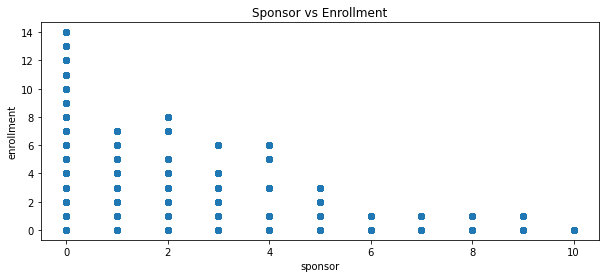

In [115]:
#scatter plot to show relation between away and home score
plt.figure(figsize=(10, 4))
sns.regplot(x = df3["away_score"], y = df3["home_score"], fit_reg=False)
plt.title('away_score vs home score')
plt.xlabel('away_score')
plt.ylabel('home_score')
plt.show()

#### line score

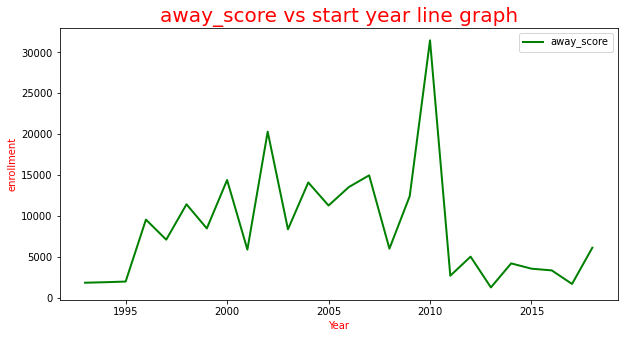

In [118]:
#Biviate analysis: away score vs year
newDf=df2.groupby([df2.year]).sum()
newDf.away_score.plot(figsize=(10,5), linewidth=2, color="g")
plt.title('away_score vs year line graph', fontsize=20, color="r")
plt.xlabel('Year', fontsize=10, color="r");
plt.ylabel('away score', fontsize=10, color="r")
plt.legend()
plt.show()

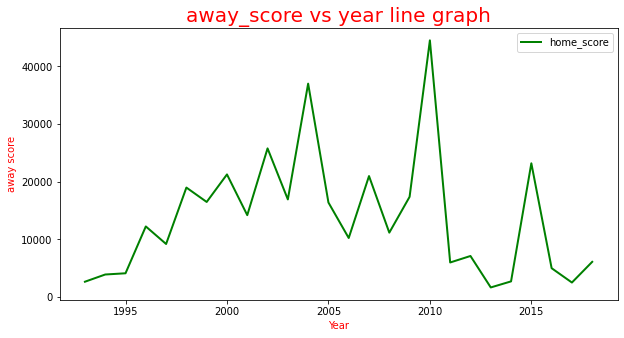

In [119]:
#Biviate analysis: away score vs year
home_scoreDf=df2.groupby([df2.year]).sum()
home_scoreDf.home_score.plot(figsize=(10,5), linewidth=2, color="g")
plt.title('away_score vs year line graph', fontsize=20, color="r")
plt.xlabel('Year', fontsize=10, color="r");
plt.ylabel('home score', fontsize=10, color="r")
plt.legend()
plt.show()

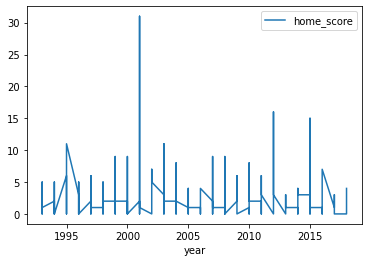

In [88]:

# use plot() method on the dataframe
df2.plot( 'year' , 'home_score' )

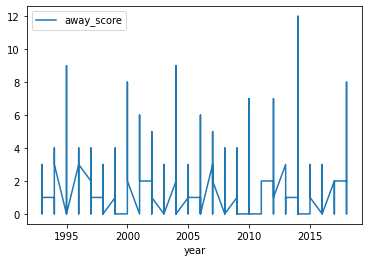

In [89]:
# use plot() method on the dataframe
df2.plot( 'year' , 'away_score' )

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


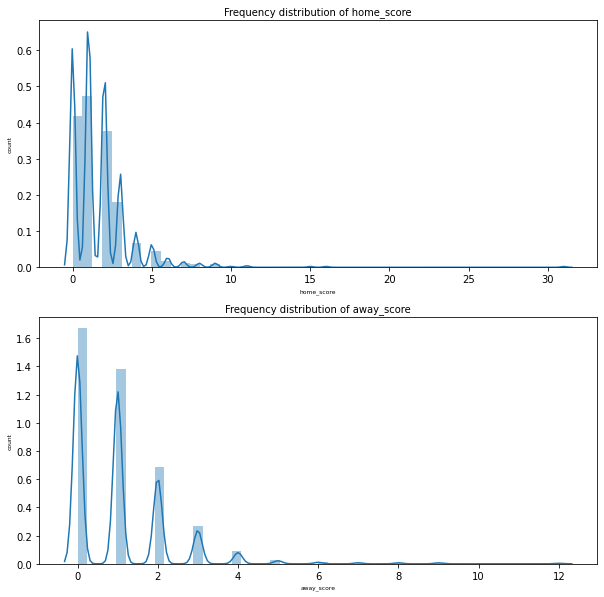

In [79]:
#we plot frequency distribution of home and away scores
col_names = ['home_score', 'away_score']
fig, ax = plt.subplots(len(col_names), figsize=(10,10))

for i, col_val in enumerate(col_names):
  sns.distplot(df2[col_val], hist=True, ax=ax[i])
  ax[i].set_title('Frequency distribution of '+col_val, fontsize=10)
  ax[i].set_xlabel(col_val, fontsize=6)
  ax[i].set_ylabel('count', fontsize=6)

Text(0, 0.5, 'home_score')

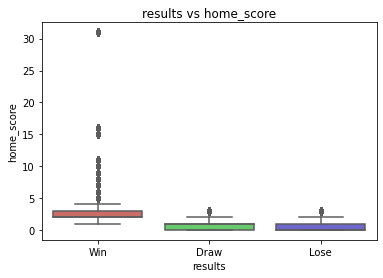

In [80]:
sns.boxplot(x='result', y='home_score', data=df2, palette='hls')
plt.title('results vs home_score')
plt.xlabel('results')
plt.ylabel('home_score')

Text(0, 0.5, 'home_score')

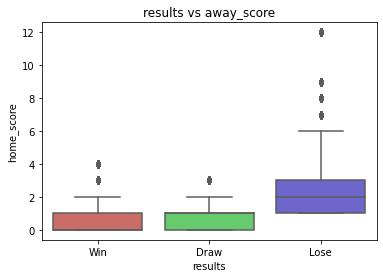

In [82]:
sns.boxplot(x='result', y='away_score', data=df2, palette='hls')
plt.title('results vs away_score')
plt.xlabel('results')
plt.ylabel('home_score')

# Detecting muliticollinearity

In [124]:
multicollinearity = df2[['home_score', 'away_score']].corr()
multicollinearity.head()

,home_score,away_score
home_score,1.000000,-0.144337
away_score,-0.144337,1.000000


In [125]:
## Creating the VIF 
multicollinearity_vif = pd.DataFrame(np.linalg.inv(multicollinearity.values), index= multicollinearity.index, columns = multicollinearity.columns)
multicollinearity_vif

,home_score,away_score
home_score,1.021276,0.147408
away_score,0.147408,1.021276



# Polinomial regression

In [ ]:
# Splitting our dataset
#
X = new_dmy[["Win","Lose"]]
y = new_dmy["home_score"]

In [176]:
#Encoding categorical variables

X = pd.get_dummies(X, drop_first=True)

In [194]:
#Splitting the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [195]:
# Fit polynomial Regression to the dataset
poly_reg_4 = PolynomialFeatures(degree = 4) 
X_poly = poly_reg_4.fit_transform(X)

pol_reg1 = LinearRegression()
pol_reg1.fit(X_poly, y)

LinearRegression()

In [175]:
poly_feat = PolynomialFeatures(degree = 3, include_bias = False) 
poly_feat.fit(X)
X_poly = poly_feat.transform(X)

In [197]:
pol_reg = LinearRegression()
pol_reg.fit(X_train, y_train)
predictions = pol_reg.predict(X_test)

In [198]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error: 0.9693191157958465
Mean Squared Error: 2.800858973328456
Root Mean Squared Error: 1.6735767007605167


# Logistic Regression

In [97]:
# We first start by Converting categorical variables to a dummy indicators
# ---
# The next thing we need to do is reformat our variables so that they work with the model. 
# Specifically, we need to reformat the Sex and Embarked variables into numeric variables.
#
result = pd.get_dummies(df2['result'],drop_first=True)
result.head()

,Lose,Win
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [161]:
#We convert tourament column
result = pd.get_dummies(df2['tournament'],drop_first=True)
result.head()

,AFC Asian Cup qualification,AFC Challenge Cup qualification,AFF Championship,African Cup of Nations,African Cup of Nations qualification,African Nations Championship,CECAFA Cup,CFU Caribbean Cup,CFU Caribbean Cup qualification,CONIFA World Football Cup,COSAFA Cup,Confederations Cup,Copa América,Copa del Pacífico,Cyprus International Tournament,EAFF Championship,FIFA World Cup qualification,Friendly,Gold Cup,Gold Cup qualification,Gulf Cup,Intercontinental Cup,King's Cup,Korea Cup,Malta International Tournament,Merdeka Tournament,Millennium Cup,Nehru Cup,Oceania Nations Cup,Prime Minister's Cup,SAFF Cup,South Pacific Games,UAFA Cup,UEFA Euro qualification,UNCAF Cup,USA Cup,United Arab Emirates Friendship Tournament,Viva World Cup,Windward Islands Tournament
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [98]:
#we create a new dataset with correct format
new_dmy = pd.concat([df2,result],axis=1)
new_dmy.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,rank,country_full,rank_date,result,year,month,Lose,Win
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,1,Germany,1993-08-08,Win,1993,8,0,1
1,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,2,Italy,1993-08-08,Win,1993,8,0,1
2,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,3,Switzerland,1993-08-08,Win,1993,8,0,1
3,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,4,Sweden,1993-08-08,Win,1993,8,0,1
4,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,5,Argentina,1993-08-08,Win,1993,8,0,1


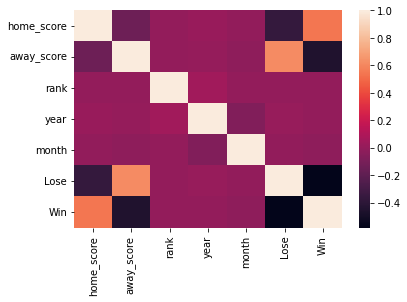

In [101]:
# Checking for independence between features¶
# 
sb.heatmap(new_dmy.corr())

In [104]:
new_dmy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212831 entries, 0 to 212830
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   date          212831 non-null  object
 1   home_team     212831 non-null  object
 2   away_team     212831 non-null  object
 3   home_score    212831 non-null  int64 
 4   away_score    212831 non-null  int64 
 5   tournament    212831 non-null  object
 6   city          212831 non-null  object
 7   country       212831 non-null  object
 8   rank          212831 non-null  int64 
 9   country_full  212831 non-null  object
 10  rank_date     212831 non-null  object
 11  result        212831 non-null  object
 12  year          212831 non-null  int64 
 13  month         212831 non-null  int64 
 14  Lose          212831 non-null  uint8 
 15  Win           212831 non-null  uint8 
dtypes: int64(5), object(9), uint8(2)
memory usage: 23.1+ MB


In [167]:
# Splitting our dataset
#
X = new_dmy[["Win","Lose"]]
y = new_dmy["home_score"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

In [168]:
# Fitting our model
# 
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [169]:
# Using our model to make a prediction
#
y_pred = LogReg.predict(X_test)

In [170]:
# Evaluating the model
#
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix


array([[10262,  6218,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0],
       [ 5372,  6768,  6713,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0],
       [  970,  2452, 11416,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0],
       [  210,   399,  6491,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0],
       [    0,     0,  2715,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0],
       [    0,     0,  1695,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0],
       [    0,     0,   717,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0],
       [    0,     0,   422,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0],
       [    0,     0,   

In [186]:
print("Accuracy: ",accuracy_score(y_test, y_pred))

Accuracy:  0.2568363351605325


# Challenging my solutions

In challenging my solution i will peerfom multiple kinear regression in my columns of interest and try to see which of the three models is the best

# Linear regression

In [187]:
# Dividing our data into training and test sets
# ---
# 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [188]:
# Training the Algorithm
# ---
# To train the algorithm we execute the same code as before, using the fit() method of the LinearRegression class
# ---
# 
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [189]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Win,1.973487
Lose,-0.326979


In [190]:
# Making Predictions
# ---
# To make pre-dictions on the test data, execute the following
# ---
# 
y_pred = regressor.predict(X_test)

# To compare the actual output values for X_test with the predicted values
# 
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df


,Actual,Predicted
184163,3,2.775458
192333,1,0.801971
63473,0,0.474992
88748,0,0.474992
11738,1,0.474992
...,...,...
112692,0,0.801971
212431,3,2.775458
99857,7,2.775458
24718,4,2.775458


In [191]:
# Evaluating the Algorithm
# ---
# 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.9672159721168074
Mean Squared Error: 2.785767149210234
Root Mean Squared Error: 1.6690617571588637


# Conclusion

Based on the models ive built for this project , i would choose the linear regression model.